# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [59]:
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris, load_wine, load_boston
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import export_graphviz
import graphviz
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.filterwarnings(action='ignore')

## 파이썬 기반 XGBoost

In [2]:
cancer = load_breast_cancer()
train_X, test_X, train_y, test_y = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(data = train_X, label = train_y)
dtest = xgb.DMatrix(data = test_X, label = test_y)

In [3]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
}
num_rounds = 400

In [4]:
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain = dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals = evals)

[21:27:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.61013	test-logloss:0.61295
[1]	train-logloss:0.54148	test-logloss:0.54652
[2]	train-logloss:0.48443	test-logloss:0.49286
[3]	train-logloss:0.43386	test-logloss:0.44338
[4]	train-logloss:0.39221	test-logloss:0.40481
[5]	train-logloss:0.35555	test-logloss:0.36927
[6]	train-logloss:0.32411	test-logloss:0.34005
[7]	train-logloss:0.29599	test-logloss:0.31253
[8]	train-logloss:0.27116	test-logloss:0.28952
[9]	train-logloss:0.24929	test-logloss:0.26842
[10]	train-logloss:0.22989	test-logloss:0.25029
[11]	train-logloss:0.21277	test-logloss:0.23495
[12]	train-

In [5]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[0.988 0.    0.    1.    1.    0.    0.001 0.106 0.361 1.   ]


In [6]:
preds = [1 if i > 0.5 else 0 for i in predicts]

In [7]:
print('accuracy_score (정확도) : {}'.format(accuracy_score(test_y, preds)))
print('precision_score (정밀도) : {}'.format(precision_score(test_y, preds)))
print('recall_score (재현율) : {}'.format(recall_score(test_y, preds)))

accuracy_score (정확도) : 0.9824561403508771
precision_score (정밀도) : 0.9906542056074766
recall_score (재현율) : 0.9814814814814815


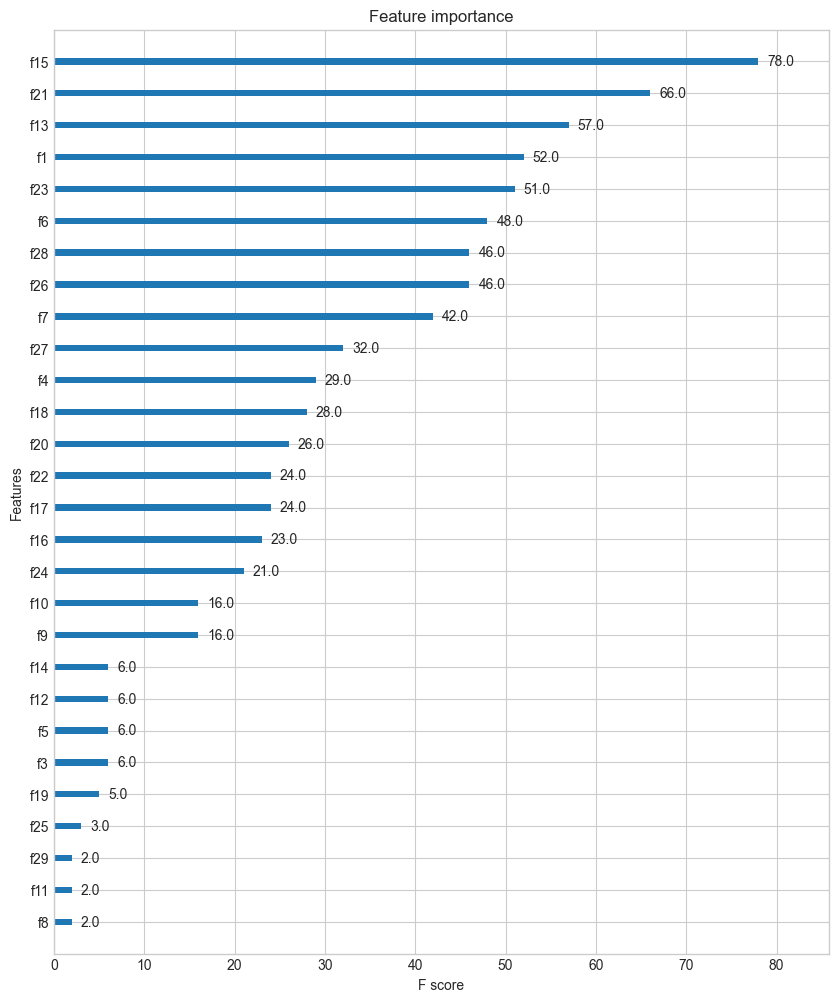

In [8]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax);

In [15]:
dot_data = xgb.to_graphviz(xgb_model)

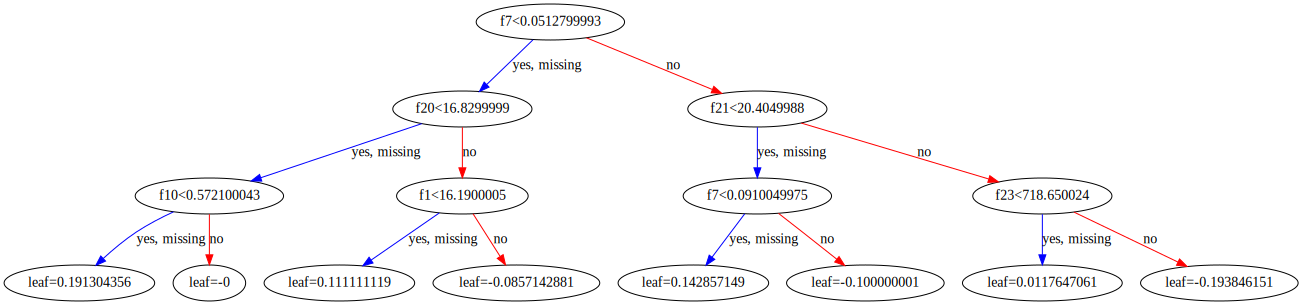

In [16]:
dot_data

## XGBClassifier

### 붓꽃 데이터

In [43]:
iris = load_iris()
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [44]:
xgbc = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(train_X, train_y)
preds = xgbc.predict(test_X)
preds_proba = xgbc.predict_proba(test_X)[:,1]

In [45]:
cross_val = cross_validate(
    estimator=xgbc,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.08042974472045898 (+/- 0.007015545833889901)
avg score time = 0.0014050960540771484 (+/- 0.0004917507337679287)
avg test score = 0.96 (+/- 0.024944382578492935)


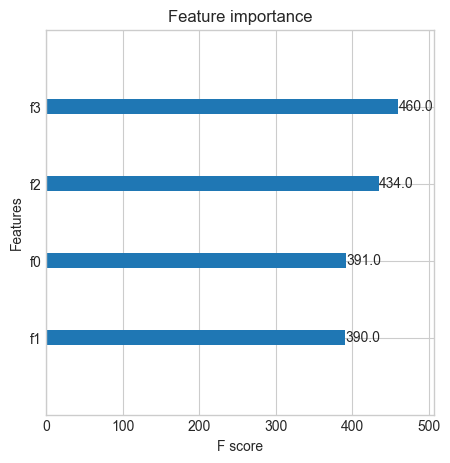

In [46]:
fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(xgbc, ax = ax);

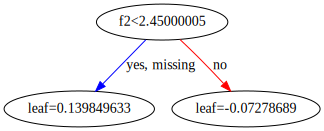

In [47]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

### 와인 데이터

In [48]:
wine = load_wine()
train_X, test_X, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

In [49]:
xgbc = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(train_X, train_y)
preds = xgbc.predict(test_X)
preds_proba = xgbc.predict_proba(test_X)[:,1]

In [50]:
cross_val = cross_validate(
    estimator=xgbc,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.07485833168029785 (+/- 0.001245735041602997)
avg score time = 0.0014048576354980468 (+/- 0.0004915560581092868)
avg test score = 0.9609523809523809 (+/- 0.028267341226138717)


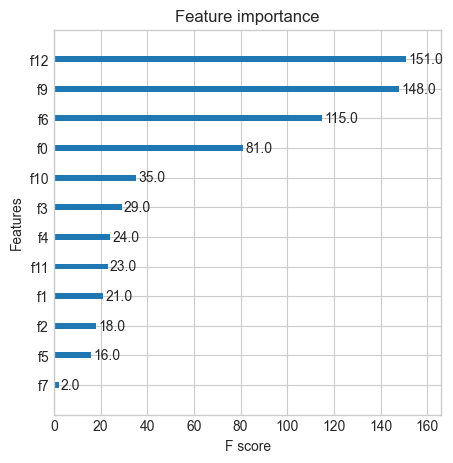

In [51]:
fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(xgbc, ax = ax);

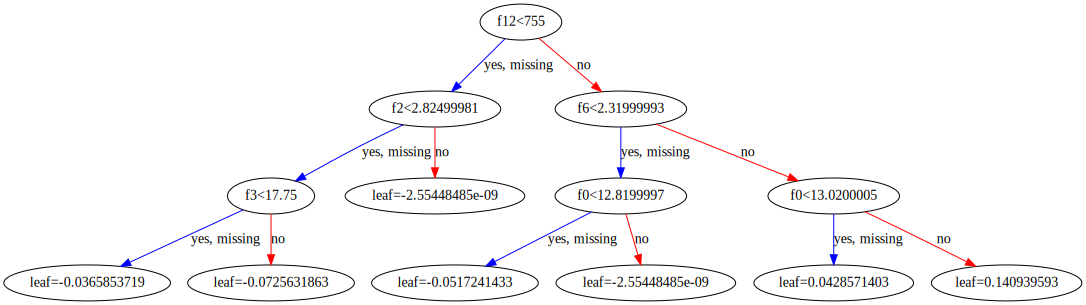

In [52]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

### 유방암 데이터

In [53]:
cancer = load_breast_cancer()
train_X, test_X, train_y, test_y = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [54]:
xgbc = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(train_X, train_y)
preds = xgbc.predict(test_X)
preds_proba = xgbc.predict_proba(test_X)[:,1]

In [55]:
cross_val = cross_validate(
    estimator=xgbc,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.05837750434875488 (+/- 0.0003519058550599453)
avg score time = 0.0014053821563720704 (+/- 0.0004911284907731265)
avg test score = 0.9736376339077782 (+/- 0.009609619188189153)


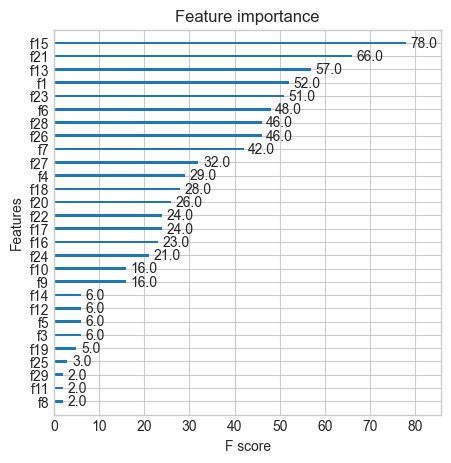

In [56]:
fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(xgbc, ax = ax);

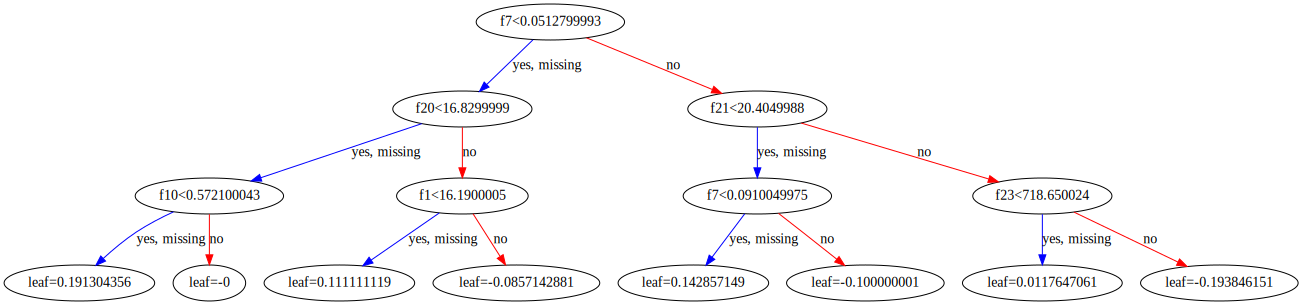

In [57]:
dot_data = xgb.to_graphviz(xgbc)
dot_data

## XGBRegressor

### 보스턴 데이터

In [58]:
boston = load_boston()
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

In [60]:
xgbr = XGBRegressor(n_estimators=400, learning_rate = 0.1, max_depth = 3, objective='reg:squarederror')
xgbr.fit(train_X, train_y)
preds = xgbr.predict(test_X)

In [61]:
cross_val = cross_validate(
    estimator=xgbr,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.0660287857055664 (+/- 0.0034410175134823883)
avg score time = 0.0012041568756103516 (+/- 0.00040142537225359726)
avg test score = 0.6884390736705599 (+/- 0.1649974770303876)


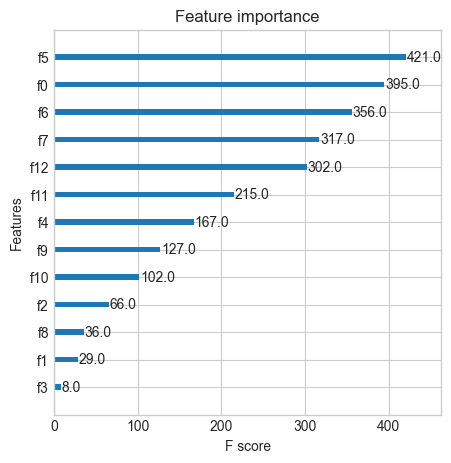

In [65]:
fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(xgbr, ax = ax);

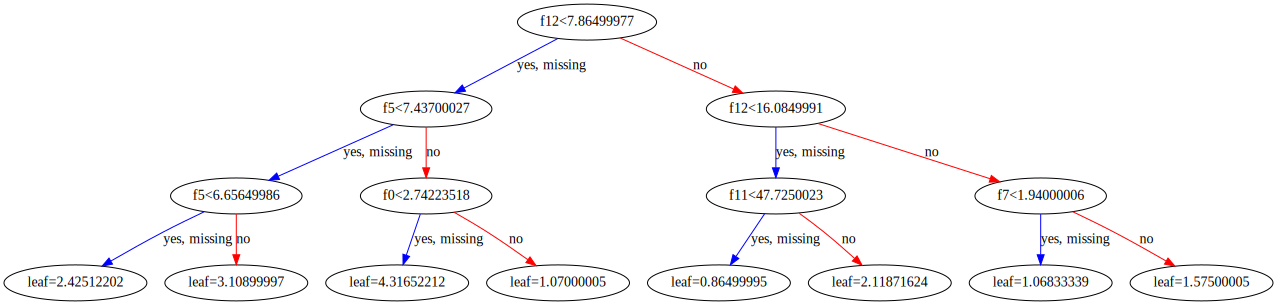

In [66]:
dot_data = xgb.to_graphviz(xgbr)
dot_data

### 당뇨병 데이터

In [67]:
diabetes = load_diabetes()
train_X, test_X, train_y, test_y = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

In [68]:
xgbr = XGBRegressor(n_estimators=400, learning_rate = 0.1, max_depth = 3, objective='reg:squarederror')
xgbr.fit(train_X, train_y)
preds = xgbr.predict(test_X)

In [69]:
cross_val = cross_validate(
    estimator=xgbr,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.06307921409606934 (+/- 0.003433250684130324)
avg score time = 0.0014049530029296875 (+/- 0.0004916729282480743)
avg test score = 0.30005291115066424 (+/- 0.07589309667544569)


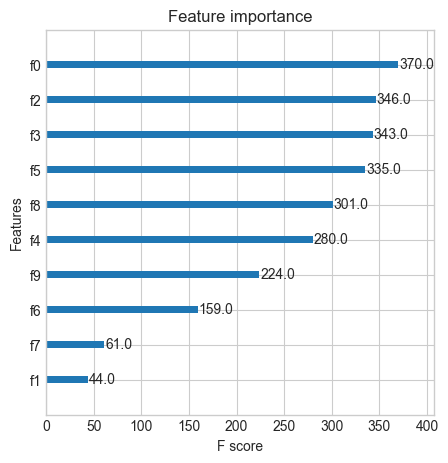

In [70]:
fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(xgbr, ax = ax);

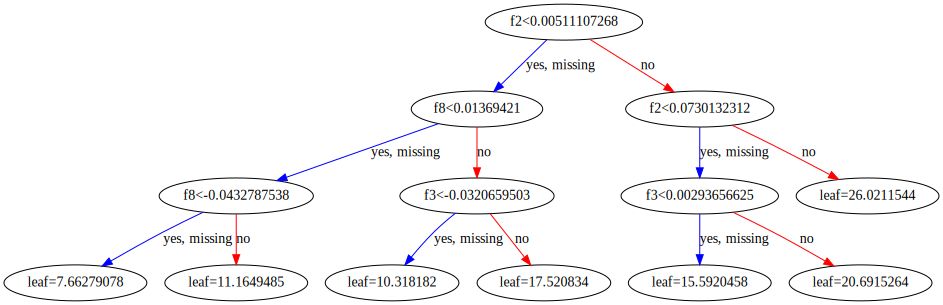

In [71]:
dot_data = xgb.to_graphviz(xgbr)
dot_data

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

## LightGBM 라이브러리 설치

In [72]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [73]:
iris = load_iris()
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=42)

In [75]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(test_X, test_y)]
lgbmc.fit(train_X, train_y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose = True)
preds = lgbmc.predict(test_X)

[1]	valid_0's multi_logloss: 0.962225
[2]	valid_0's multi_logloss: 0.825196
[3]	valid_0's multi_logloss: 0.711653
[4]	valid_0's multi_logloss: 0.616845
[5]	valid_0's multi_logloss: 0.539861
[6]	valid_0's multi_logloss: 0.472727
[7]	valid_0's multi_logloss: 0.416545
[8]	valid_0's multi_logloss: 0.370911
[9]	valid_0's multi_logloss: 0.32993
[10]	valid_0's multi_logloss: 0.295947
[11]	valid_0's multi_logloss: 0.266793
[12]	valid_0's multi_logloss: 0.239506
[13]	valid_0's multi_logloss: 0.217598
[14]	valid_0's multi_logloss: 0.198147
[15]	valid_0's multi_logloss: 0.179466
[16]	valid_0's multi_logloss: 0.161994
[17]	valid_0's multi_logloss: 0.14866
[18]	valid_0's multi_logloss: 0.134736
[19]	valid_0's multi_logloss: 0.123261
[20]	valid_0's multi_logloss: 0.113268
[21]	valid_0's multi_logloss: 0.103585
[22]	valid_0's multi_logloss: 0.0968302
[23]	valid_0's multi_logloss: 0.0898544
[24]	valid_0's multi_logloss: 0.0836532
[25]	valid_0's multi_logloss: 0.0791191
[26]	valid_0's multi_logloss: 0.

In [76]:
cross_val = cross_validate(
    estimator=lgbmc,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.05011539459228516 (+/- 0.008164541372101462)
avg score time = 0.0004014015197753906 (+/- 0.0004916144527136991)
avg test score = 0.9600000000000002 (+/- 0.04898979485566355)


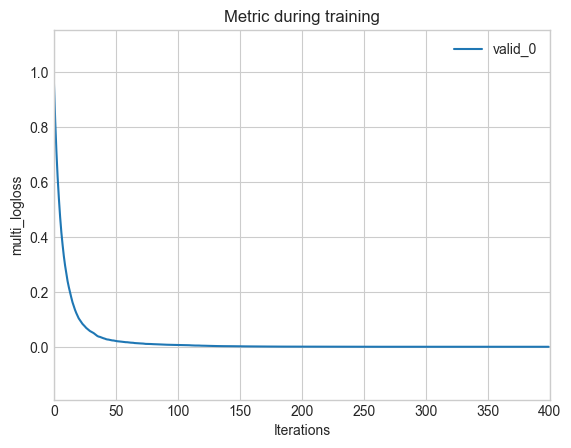

In [77]:
plot_metric(lgbmc);

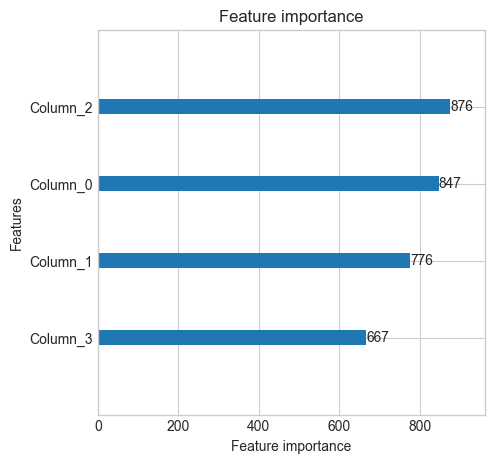

In [78]:
plot_importance(lgbmc, figsize=(5, 5));

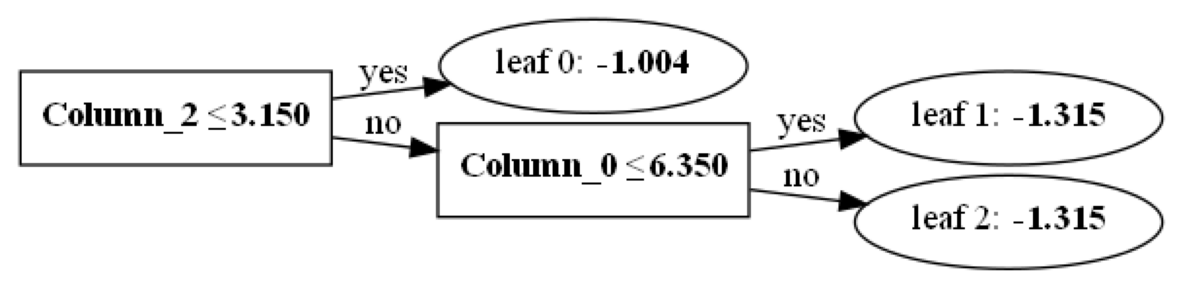

In [81]:
plot_tree(lgbmc, figsize=(15, 10));

### 와인 데이터

In [82]:
wine = load_wine()
train_X, test_X, train_y, test_y = train_test_split(wine.data, wine.target, test_size = 0.3, random_state=42)

In [83]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(test_X, test_y)]
lgbmc.fit(train_X, train_y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose = True)
preds = lgbmc.predict(test_X)

[1]	valid_0's multi_logloss: 0.951272
[2]	valid_0's multi_logloss: 0.838905
[3]	valid_0's multi_logloss: 0.74985
[4]	valid_0's multi_logloss: 0.67168
[5]	valid_0's multi_logloss: 0.605911
[6]	valid_0's multi_logloss: 0.549331
[7]	valid_0's multi_logloss: 0.502006
[8]	valid_0's multi_logloss: 0.461851
[9]	valid_0's multi_logloss: 0.422261
[10]	valid_0's multi_logloss: 0.388612
[11]	valid_0's multi_logloss: 0.360649
[12]	valid_0's multi_logloss: 0.333147
[13]	valid_0's multi_logloss: 0.31282
[14]	valid_0's multi_logloss: 0.292059
[15]	valid_0's multi_logloss: 0.270537
[16]	valid_0's multi_logloss: 0.253788
[17]	valid_0's multi_logloss: 0.237653
[18]	valid_0's multi_logloss: 0.221949
[19]	valid_0's multi_logloss: 0.208899
[20]	valid_0's multi_logloss: 0.195216
[21]	valid_0's multi_logloss: 0.185228
[22]	valid_0's multi_logloss: 0.174026
[23]	valid_0's multi_logloss: 0.16386
[24]	valid_0's multi_logloss: 0.151383
[25]	valid_0's multi_logloss: 0.144908
[26]	valid_0's multi_logloss: 0.13784


In [84]:
cross_val = cross_validate(
    estimator=lgbmc,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.04425029754638672 (+/- 0.003147345706413697)
avg score time = 0.0006021499633789062 (+/- 0.0004916533940124228)
avg test score = 0.9776190476190475 (+/- 0.01119469694127331)


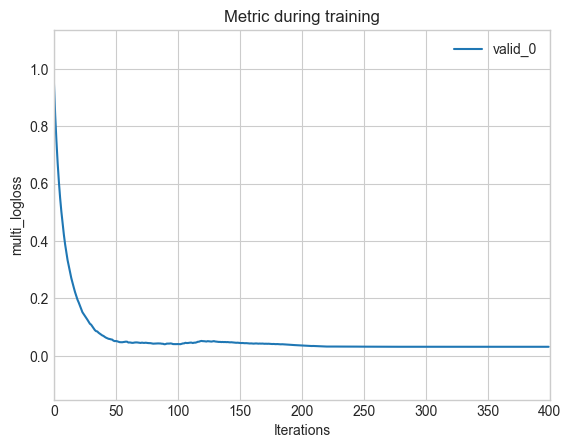

In [85]:
plot_metric(lgbmc);

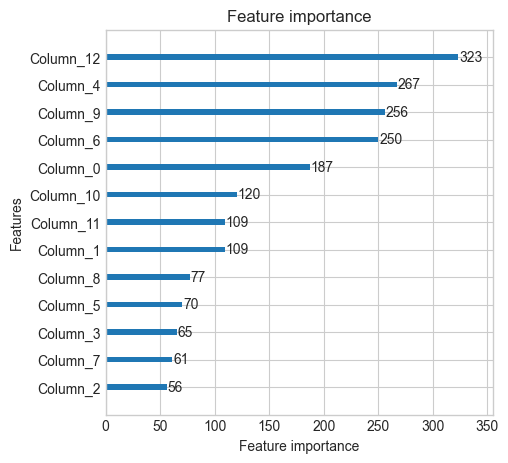

In [86]:
plot_importance(lgbmc, figsize=(5, 5));

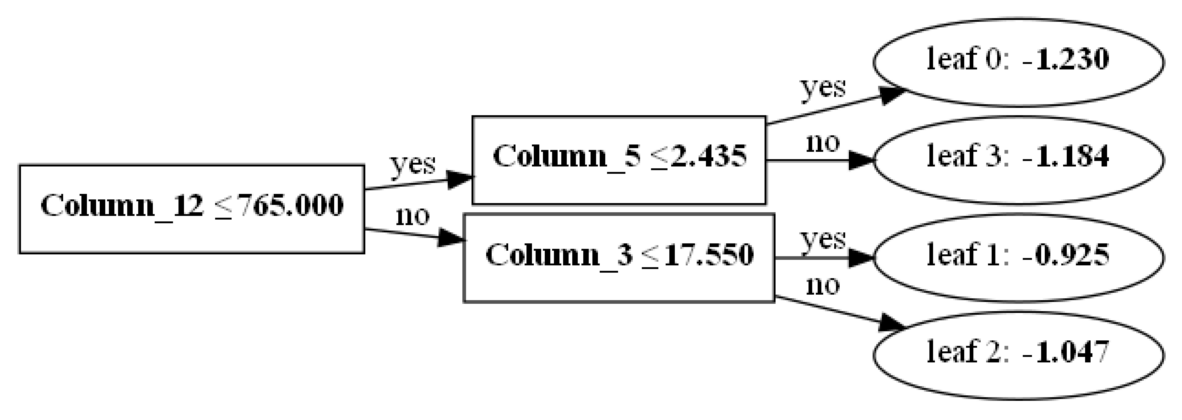

In [87]:
plot_tree(lgbmc, figsize=(15, 10));

### 유방암 데이터

In [88]:
cancer = load_breast_cancer()
train_X, test_X, train_y, test_y = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state=42)

In [89]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(test_X, test_y)]
lgbmc.fit(train_X, train_y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose = True)
preds = lgbmc.predict(test_X)

[1]	valid_0's binary_logloss: 0.580066
[2]	valid_0's binary_logloss: 0.517066
[3]	valid_0's binary_logloss: 0.467658
[4]	valid_0's binary_logloss: 0.425641
[5]	valid_0's binary_logloss: 0.389058
[6]	valid_0's binary_logloss: 0.358142
[7]	valid_0's binary_logloss: 0.3308
[8]	valid_0's binary_logloss: 0.30601
[9]	valid_0's binary_logloss: 0.285195
[10]	valid_0's binary_logloss: 0.264854
[11]	valid_0's binary_logloss: 0.248121
[12]	valid_0's binary_logloss: 0.232118
[13]	valid_0's binary_logloss: 0.219646
[14]	valid_0's binary_logloss: 0.209191
[15]	valid_0's binary_logloss: 0.199848
[16]	valid_0's binary_logloss: 0.188049
[17]	valid_0's binary_logloss: 0.17796
[18]	valid_0's binary_logloss: 0.16927
[19]	valid_0's binary_logloss: 0.164373
[20]	valid_0's binary_logloss: 0.157576
[21]	valid_0's binary_logloss: 0.152085
[22]	valid_0's binary_logloss: 0.14823
[23]	valid_0's binary_logloss: 0.143835
[24]	valid_0's binary_logloss: 0.139037
[25]	valid_0's binary_logloss: 0.135421
[26]	valid_0's 

In [90]:
cross_val = cross_validate(
    estimator=lgbmc,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.050134897232055664 (+/- 0.006812415854113503)
avg score time = 0.0004014015197753906 (+/- 0.0004916144527136991)
avg test score = 0.9736531594472908 (+/- 0.015674460437800138)


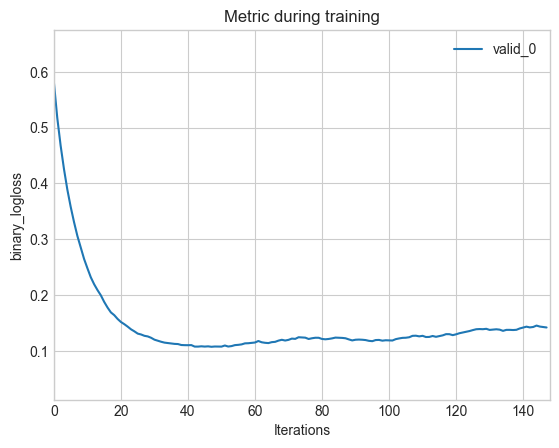

In [91]:
plot_metric(lgbmc);

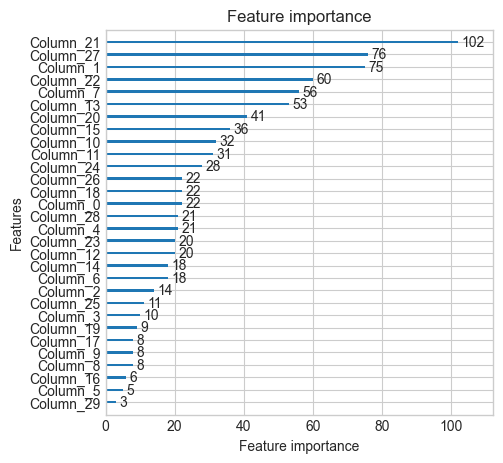

In [92]:
plot_importance(lgbmc, figsize=(5, 5));

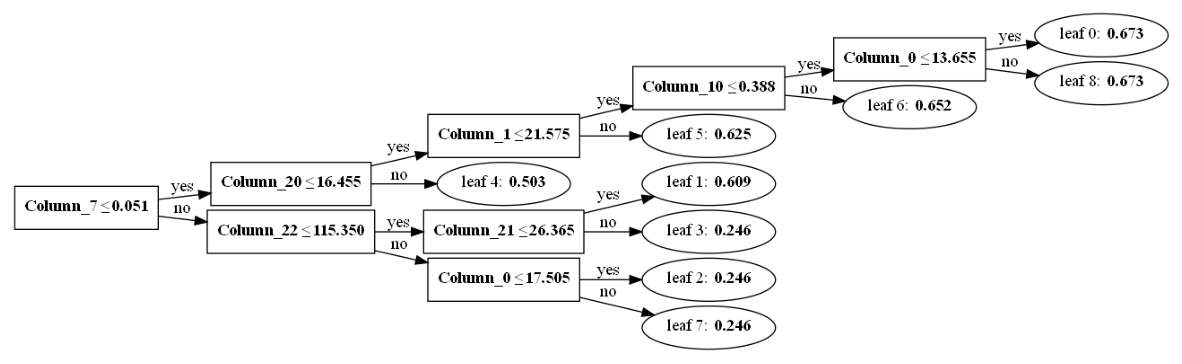

In [93]:
plot_tree(lgbmc, figsize=(15, 10));

## LGBMRegressor

### 보스턴 데이터

In [94]:
boston = load_boston()
train_X, test_X, train_y, test_y = train_test_split(boston.data, boston.target, test_size = 0.3, random_state=42)

In [95]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(test_X, test_y)]
lgbmr.fit(train_X, train_y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose = True)
preds = lgbmr.predict(test_X)

[1]	valid_0's l2: 65.7162
[2]	valid_0's l2: 56.7131
[3]	valid_0's l2: 49.159
[4]	valid_0's l2: 43.0422
[5]	valid_0's l2: 37.9557
[6]	valid_0's l2: 33.7043
[7]	valid_0's l2: 30.4385
[8]	valid_0's l2: 27.9803
[9]	valid_0's l2: 25.8819
[10]	valid_0's l2: 23.9016
[11]	valid_0's l2: 22.4884
[12]	valid_0's l2: 20.871
[13]	valid_0's l2: 19.5505
[14]	valid_0's l2: 18.6695
[15]	valid_0's l2: 17.8842
[16]	valid_0's l2: 17.1739
[17]	valid_0's l2: 16.6865
[18]	valid_0's l2: 16.1623
[19]	valid_0's l2: 15.5649
[20]	valid_0's l2: 15.4219
[21]	valid_0's l2: 15.0994
[22]	valid_0's l2: 14.8441
[23]	valid_0's l2: 14.5592
[24]	valid_0's l2: 14.3818
[25]	valid_0's l2: 14.2751
[26]	valid_0's l2: 14.1703
[27]	valid_0's l2: 13.9673
[28]	valid_0's l2: 13.8556
[29]	valid_0's l2: 13.6974
[30]	valid_0's l2: 13.5266
[31]	valid_0's l2: 13.4615
[32]	valid_0's l2: 13.3362
[33]	valid_0's l2: 13.319
[34]	valid_0's l2: 13.1923
[35]	valid_0's l2: 13.1317
[36]	valid_0's l2: 12.992
[37]	valid_0's l2: 12.9711
[38]	valid_0's

In [96]:
cross_val = cross_validate(
    estimator=lgbmr,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.06402082443237304 (+/- 0.016580684670020072)
avg score time = 0.0010034561157226563 (+/- 9.536743164062499e-08)
avg test score = 0.5692468252571979 (+/- 0.2956636613238221)


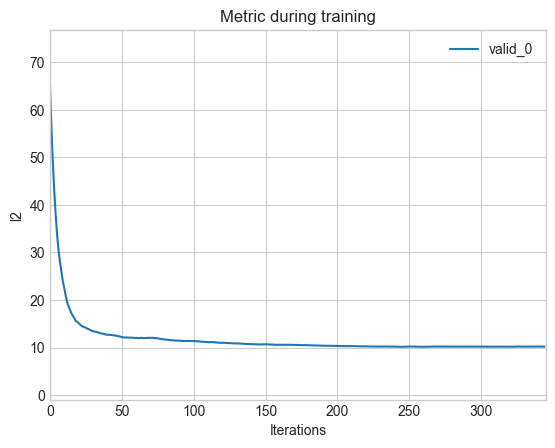

In [97]:
plot_metric(lgbmr);

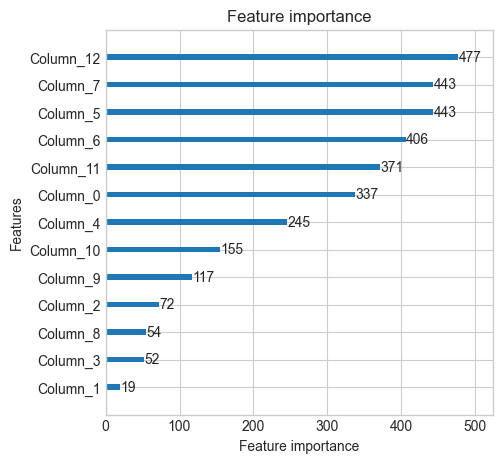

In [98]:
plot_importance(lgbmr, figsize=(5, 5));

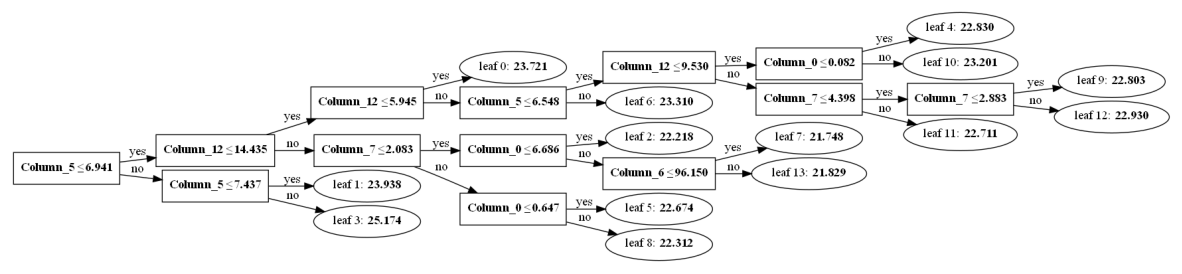

In [99]:
plot_tree(lgbmr, figsize=(15, 10));

### 당뇨병 데이터

In [100]:
diabetes = load_diabetes()
train_X, test_X, train_y, test_y = train_test_split(diabetes.data, diabetes.target, test_size = 0.3, random_state=42)

In [101]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(test_X, test_y)]
lgbmr.fit(train_X, train_y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose = True)
preds = lgbmr.predict(test_X)

[1]	valid_0's l2: 4969.88
[2]	valid_0's l2: 4554.91
[3]	valid_0's l2: 4257.93
[4]	valid_0's l2: 3973.54
[5]	valid_0's l2: 3797.52
[6]	valid_0's l2: 3593.3
[7]	valid_0's l2: 3457.9
[8]	valid_0's l2: 3330.01
[9]	valid_0's l2: 3232.1
[10]	valid_0's l2: 3185.53
[11]	valid_0's l2: 3124.56
[12]	valid_0's l2: 3086.26
[13]	valid_0's l2: 3036.93
[14]	valid_0's l2: 3017.58
[15]	valid_0's l2: 2981.15
[16]	valid_0's l2: 2931.18
[17]	valid_0's l2: 2906.48
[18]	valid_0's l2: 2898.61
[19]	valid_0's l2: 2872.45
[20]	valid_0's l2: 2863.93
[21]	valid_0's l2: 2847.4
[22]	valid_0's l2: 2849.62
[23]	valid_0's l2: 2852.26
[24]	valid_0's l2: 2827.48
[25]	valid_0's l2: 2839.89
[26]	valid_0's l2: 2835.81
[27]	valid_0's l2: 2821.45
[28]	valid_0's l2: 2804.08
[29]	valid_0's l2: 2798.24
[30]	valid_0's l2: 2799.98
[31]	valid_0's l2: 2800.55
[32]	valid_0's l2: 2792.62
[33]	valid_0's l2: 2816.1
[34]	valid_0's l2: 2843.42
[35]	valid_0's l2: 2853.66
[36]	valid_0's l2: 2870.55
[37]	valid_0's l2: 2867.37
[38]	valid_0's 

In [102]:
cross_val = cross_validate(
    estimator=lgbmr,
    X = diabetes.data, y = diabetes.target,
    cv = 5
)
print('avg fit time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time = 0.04615769386291504 (+/- 0.005775026196845101)
avg score time = 0.0004014492034912109 (+/- 0.0004916728588807129)
avg test score = 0.30867643947179507 (+/- 0.07010708786960605)


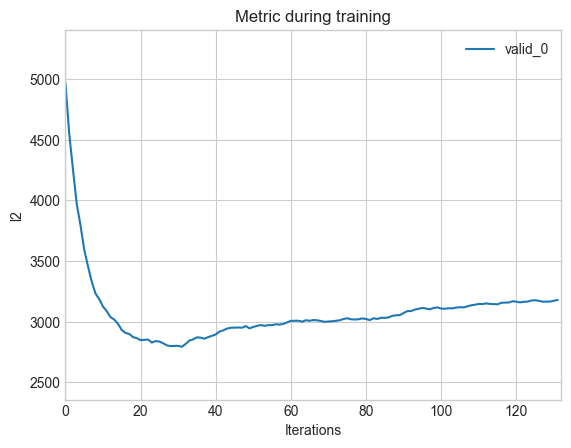

In [103]:
plot_metric(lgbmr);

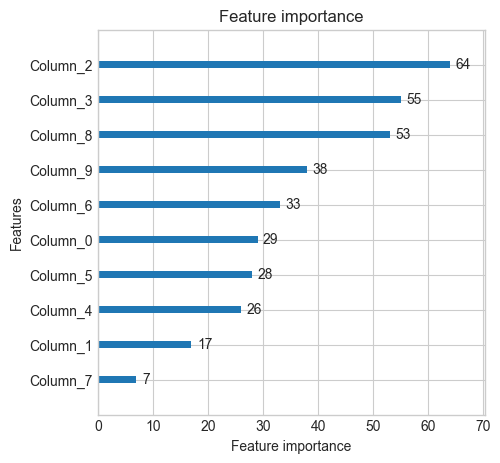

In [104]:
plot_importance(lgbmr, figsize=(5, 5));

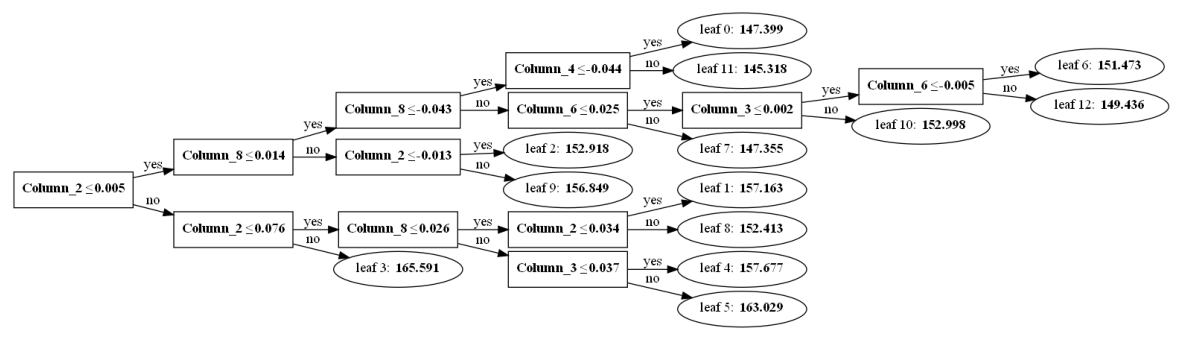

In [105]:
plot_tree(lgbmr, figsize=(15, 10));